In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nengo
import scipy
import time
import itertools
from NEF_RL import *
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

## All SIDs

In [2]:
neurons = [100]
rln2 = pd.read_pickle("data/RL_n2_carrabin_feb9_dynamics.pkl")
target_alphas = pd.read_pickle("data/RL_n2_carrabin_feb9_params.pkl")['mu'].to_numpy()
human = pd.read_pickle("data/carrabin.pkl")
rln2['neurons'] = 'RLn2'
human['neurons'] = 'human'
dfs = [human, rln2]
for n in neurons:
    nef = pd.read_pickle(f"data/NEF_RL_carrabin_rln2_{n}neurons_dynamics.pkl")
    nef['neurons'] = str(n)
    dfs.append(nef)
combined = pd.concat(dfs, ignore_index=True)

In [4]:
combined['excursion'] = None
for sid in human['sid'].unique():
    print(sid)
    subdata = combined.query("sid==@sid")
    for i, row in subdata.iterrows():
        mt = row['type']
        sid = row['sid']
        qid = row['qid']
        response = row['response']
        neurons = row['neurons']
        avg_response = subdata.query("type==@mt & sid==@sid & neurons==@neurons & qid==@qid")['response'].mean()
        combined.at[i, 'excursion'] = response - avg_response
combined.to_pickle("data/alphas_RLn2_NEF_RL_neurons.pkl")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


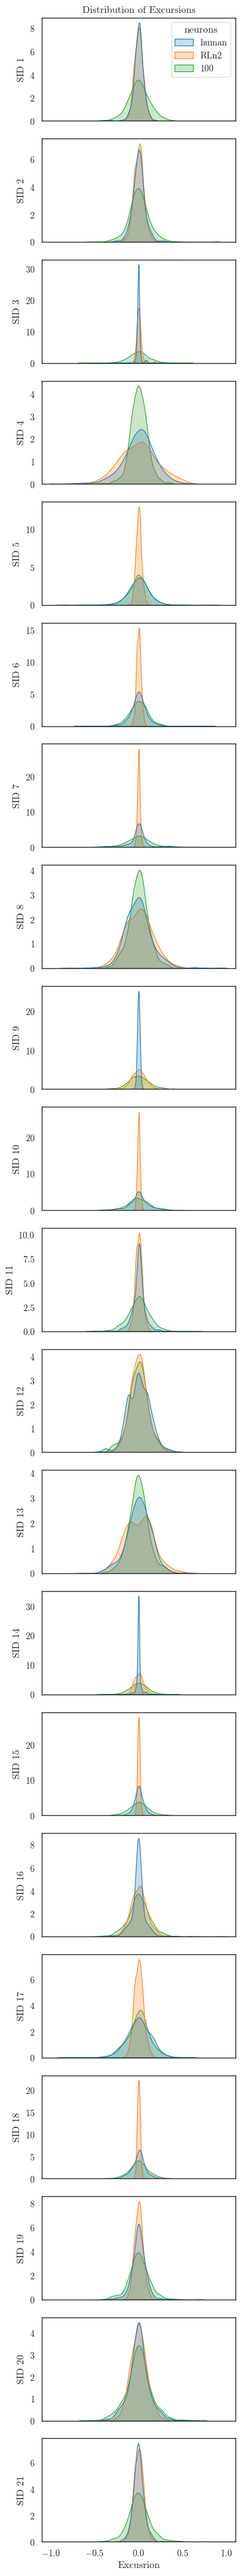

In [5]:
sids = human['sid'].unique()
fig, axes = plt.subplots(nrows=len(sids), ncols=1, figsize=(4, 2*len(sids)), sharex=True)
for s, sid in enumerate(sids):
    sns.kdeplot(combined.query("sid==@sid"), x='excursion', hue='neurons', ax=axes[s],
                clip=[-1, 1], palette=palette[:3], fill=True, common_norm=False)
    axes[s].set(ylabel=f"SID {sid}")  # , ylim=[0, 20]
    if s>0: axes[s].get_legend().remove()
axes[0].set(title='Distribution of Excursions')
axes[-1].set(xlabel='Excusrion')
plt.tight_layout()
fig.savefig("plots/excursion_distributions_all_sids.jpg", dpi=600)

### One SID

In [20]:
def plotz(sid):
    rln = pd.read_pickle(f"data/RL_n2_carrabin_{sid}_dynamics.pkl")
    nef = pd.read_pickle(f"data/NEF_RL_carrabin_{sid}_dynamics.pkl")
    target_alphas = pd.read_pickle(f"data/RL_n2_carrabin_{sid}_params.pkl")['mu'].to_numpy()
    human = pd.read_pickle("data/carrabin.pkl").query("sid==@sid")
    dfs = [human, rln, nef]
    combined = pd.concat(dfs, ignore_index=True)
    combined['excursion'] = None
    for i, row in combined.iterrows():
        mt = row['type']
        qid = row['qid']
        response = row['response']
        avg_response = combined.query("type==@mt & qid==@qid")['response'].mean()
        combined.at[i, 'excursion'] = response - avg_response
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4), sharex=True)
    sns.kdeplot(combined, x='excursion', hue='type', ax=ax, clip=[-1, 1], palette=palette[:3], fill=True, common_norm=False)
    ax.set(ylabel=f"SID {sid}")
    ax.set(title='Distribution of Excursions')
    ax.set(xlabel='Excusrion')
    plt.tight_layout()

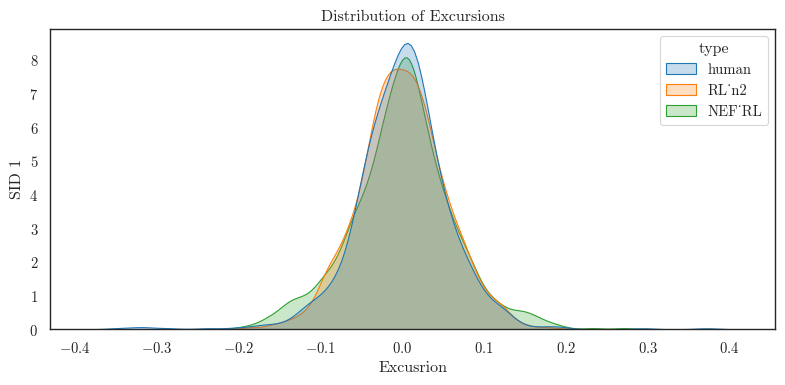

In [21]:
plotz(1)  # 300, dim2

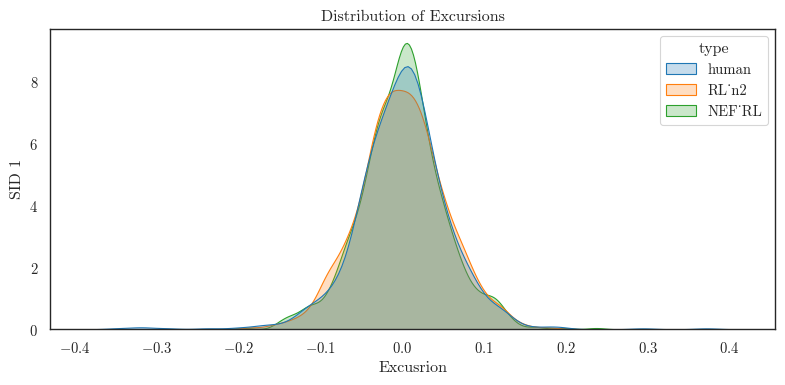

In [22]:
plotz(1)  # 300, dim7

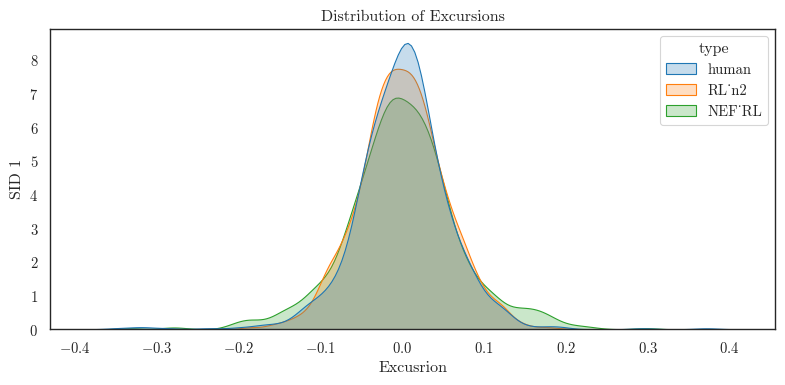

In [23]:
plotz(1)  # 200, dim7